In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
from sklearn import metrics

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
df=pd.read_csv('/content/drive/MyDrive/Buku DM/dataset/car_evaluation.csv', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [66]:
df.shape

(1728, 7)

In [67]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [68]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [70]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [71]:
X = df.drop(['class'], axis=1)

y = df['class']
X.shape, y.shape

((1728, 6), (1728,))

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [73]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1579,1,1,1,1,1,1
634,2,2,2,1,1,1
299,3,1,2,2,2,2
1085,4,1,3,2,1,2
1659,1,3,4,1,1,3


In [75]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1233,4,3,4,3,2,3
592,2,2,4,3,3,1
625,2,2,2,2,1,1
1546,1,1,4,2,3,1
730,2,1,2,2,2,1


In [76]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [77]:
y_pred_en = clf_en.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7543


In [79]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [80]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7171


[Text(0.625, 0.875, 'X[5] <= 2.5\nentropy = 1.226\nsamples = 1382\nvalue = [325, 55, 950, 52]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\nentropy = 1.482\nsamples = 937\nvalue = [325, 55, 505, 52]'),
 Text(0.25, 0.375, 'X[3] <= 1.5\nentropy = 1.893\nsamples = 227\nvalue = [78, 40, 78, 31]'),
 Text(0.125, 0.125, 'entropy = 1.578\nsamples = 80\nvalue = [44, 20, 3, 13]'),
 Text(0.375, 0.125, 'entropy = 1.746\nsamples = 147\nvalue = [34, 20, 75, 18]'),
 Text(0.75, 0.375, 'X[0] <= 3.5\nentropy = 1.239\nsamples = 710\nvalue = [247, 15, 427, 21]'),
 Text(0.625, 0.125, 'entropy = 0.893\nsamples = 471\nvalue = [146, 0, 325, 0]'),
 Text(0.875, 0.125, 'entropy = 1.608\nsamples = 239\nvalue = [101, 15, 102, 21]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 445\nvalue = [0, 0, 445, 0]')]

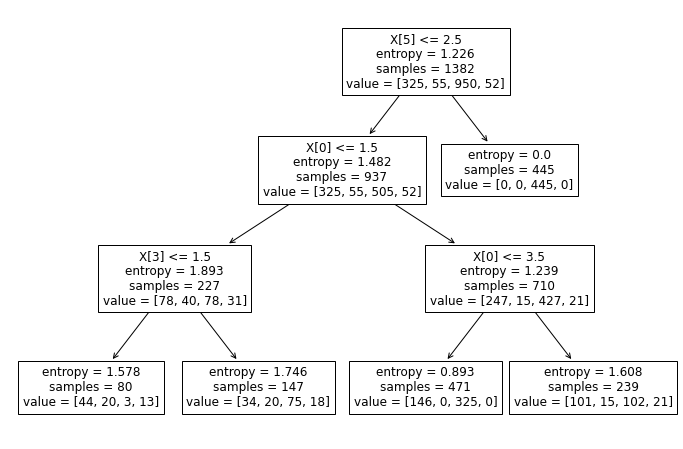

In [81]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

[Text(0.625, 0.875, 'X[5] <= 2.5\nentropy = 1.226\nsamples = 1382\nvalue = [325, 55, 950, 52]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\nentropy = 1.482\nsamples = 937\nvalue = [325, 55, 505, 52]'),
 Text(0.25, 0.375, 'X[3] <= 1.5\nentropy = 1.893\nsamples = 227\nvalue = [78, 40, 78, 31]'),
 Text(0.125, 0.125, 'entropy = 1.578\nsamples = 80\nvalue = [44, 20, 3, 13]'),
 Text(0.375, 0.125, 'entropy = 1.746\nsamples = 147\nvalue = [34, 20, 75, 18]'),
 Text(0.75, 0.375, 'X[0] <= 3.5\nentropy = 1.239\nsamples = 710\nvalue = [247, 15, 427, 21]'),
 Text(0.625, 0.125, 'entropy = 0.893\nsamples = 471\nvalue = [146, 0, 325, 0]'),
 Text(0.875, 0.125, 'entropy = 1.608\nsamples = 239\nvalue = [101, 15, 102, 21]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 445\nvalue = [0, 0, 445, 0]')]

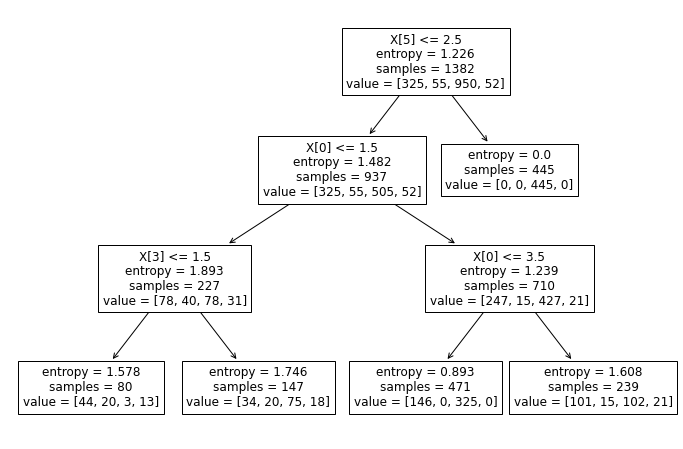

In [82]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [83]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

KeyError: ignored

In [ ]:
import graphviz
from graphviz import Source
dt = tree.export_graphviz(clf_en, out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True, special_characters = True)

graphviz.Source(dt)

KeyError: ignored

In [ ]:
import graphviz 
from graphviz import Source
dot_data = tree.export_graphviz(clf_en, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data) 
graph.render("name of file",view = True)

'name of file.pdf'

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf_en, out_file=None, 
                feature_names = X_train.columns,
                class_names = y_train,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

KeyError: ignored

In [ ]:
import graphviz
from graphviz import Source
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

KeyError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0   0   0]
 [ 13   0   0   0]
 [ 55   0 184   0]
 [ 21   0   0   0]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.45      1.00      0.62        73
        good       0.00      0.00      0.00        13
       unacc       1.00      0.77      0.87       239
       vgood       0.00      0.00      0.00        21

    accuracy                           0.74       346
   macro avg       0.36      0.44      0.37       346
weighted avg       0.79      0.74      0.73       346



In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
np.array(y_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97,  3],
       [ 9, 90]])

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9396984924623115


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       100
           1       0.97      0.91      0.94        99

    accuracy                           0.94       199
   macro avg       0.94      0.94      0.94       199
weighted avg       0.94      0.94      0.94       199



In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.97       0.94       0.94       0.9        0.96       0.92929293
 0.94949495 0.90909091 0.91919192 0.90909091]


In [ ]:
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))

Accuracy: 0.93 (0.02)


In [ ]:
# akurasi 10 fold cross validation
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print('Accuracy: {}'.format(accuracy.mean()*100))

precision = cross_val_score(model, X, y, scoring='precision_weighted', cv=cv)
print('Precision: {}'.format(precision.mean()*100))

recall = cross_val_score(model, X, y, scoring='recall_weighted', cv=cv)
print('Recall: {}'.format(recall.mean()*100))

f1 = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv)
print('F1: {}'.format(f1.mean()*100))

Accuracy: 93.26161616161615
Precision: 93.4549273514601
Recall: 93.26161616161615
F1: 93.25805159057795
